# Continuous Control

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

In [1]:
from unityagents import UnityEnvironment


# Load Reacher env with 20 agents
# env = UnityEnvironment(file_name='Reacher')
env = UnityEnvironment(
    file_name='/home/arasdar/unity-envs/Reacher_Linux_NoVis_OneAgent/Reacher_Linux_NoVis/Reacher.x86_64')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_size -> 5.0
		goal_speed -> 1.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [2]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [3]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
# print('The state for the first agent looks like:', states[0])

Number of agents: 1
Size of each action: 4
There are 1 agents. Each observes a state with length: 33


In [4]:
# env_info.rewards

### 3. Instantiate DDPG Agent

In [5]:
from agent import Agent

random_seed = 7

agent = Agent(s_size=state_size, a_size=action_size, random_seed=random_seed)

### 4. Train the Agent with DDPG

In [6]:
from collections import deque
import numpy as np
import time
import torch

n_episodes=1000
R_goal=30 # TOCHECK
R_deque = deque(maxlen=100)
Rs = [] # plot
meanRs_deque = [] # plot

In [7]:
for i_episode in range(n_episodes):
    
    # Reset Env and Agent
    env_info = env.reset(train_mode=True)[brain_name]       # reset the environment (env)    
    s = env_info.vector_observations[0]                   # get the current state (s) (for an agent)

    R = 0                            # initialize the total score (R) (for an agent)

    #for i_step in range(n_steps):
    while True:
        
        s = np.reshape(s, [1, -1])
        a = agent.act(s) # a: action [-1, +1], s: current state for an agent
        #print(a.shape)
        
        env_info = env.step(a)[brain_name]            # send an action (a) to the environment (env)
        s2 = env_info.vector_observations[0]          # get next state (s) (for an agent)
        r = env_info.rewards[0]                          # get reward (for an agent)
        done = env_info.local_done[0]               # see if episode is done/finished (terminal) for an agent
        #if r != 0: print('real reward:', r)
        if r < 0: print('negative reward:', r)
        
        # Exploration vs exploitation
        # noise = np.random.normal(loc=0, scale=0.1, size=[num_agents, action_size])
        # A += noise
        # A = np.clip(a=A, a_min=-1, a_max=1)
        if done is False:
            if np.random.normal(loc=0, scale=1) < 0:
                s2_, _ = agent.env(s, a)
                s2 = np.reshape(s2_, [-1])
                #r_ = r_[0, 0]
                #print('agent.env:', s2.shape, r)
                #print('predicted reward:', r_)
        
        #for state, action, reward, next_state, done in zip(states, actions, rewards, next_states, dones):
        #for s, a, r, s2, done in zip(S, A, rewards, S2, dones):
        agent.step(s, a, r, s2, done) # send an exprience (e) to the agent or collecting experiences (E)

        R += r                           # update the total score (for an agent)
        s = s2 # roll over state (s) to the next state (s2)


        # if i_step%learn_every == 0:
        # for _ in range(n_learn):
        gloss, dloss = agent.start_learn()

        if done: # exit loop if episode is done/finished for an agent
            break

    Rs.append(R) # plot
    R_deque.append(R)
    meanRs_deque.append(np.mean(R_deque)) # plot

    print('\rEpisode {}\tTotal Average Score: {:.2f}, \tGloss: {:.2f}, \tDloss: {:.2f}'.format(
        i_episode+1, np.mean(R_deque), gloss, dloss))  
    if np.mean(R_deque) >= R_goal:
        torch.save(agent.g.state_dict(), 'g-reacher.pth')
        torch.save(agent.d.state_dict(), 'd-reacher.pth')
        break

Episode 1	Total Average Score: 0.00, 	Gloss: 0.00, 	Dloss: 0.00
Episode 2	Total Average Score: 0.38, 	Gloss: -0.05, 	Dloss: 105.61
Episode 3	Total Average Score: 0.37, 	Gloss: -0.07, 	Dloss: 213.67
Episode 4	Total Average Score: 0.49, 	Gloss: -0.08, 	Dloss: 193.37
Episode 5	Total Average Score: 0.43, 	Gloss: -0.09, 	Dloss: 153.09
Episode 6	Total Average Score: 0.39, 	Gloss: -0.12, 	Dloss: 142.45
Episode 7	Total Average Score: 0.34, 	Gloss: -0.14, 	Dloss: 128.08
Episode 8	Total Average Score: 0.37, 	Gloss: -0.15, 	Dloss: 124.34
Episode 9	Total Average Score: 0.37, 	Gloss: -0.17, 	Dloss: 113.65
Episode 10	Total Average Score: 0.41, 	Gloss: -0.18, 	Dloss: 87.67
Episode 11	Total Average Score: 0.45, 	Gloss: -0.20, 	Dloss: 94.38
Episode 12	Total Average Score: 0.47, 	Gloss: -0.22, 	Dloss: 91.12
Episode 13	Total Average Score: 0.44, 	Gloss: -0.25, 	Dloss: 80.81
Episode 14	Total Average Score: 0.41, 	Gloss: -0.27, 	Dloss: 77.14
Episode 15	Total Average Score: 0.40, 	Gloss: -0.30, 	Dloss: 81.6

Episode 123	Total Average Score: 0.54, 	Gloss: -4.60, 	Dloss: 27.87
Episode 124	Total Average Score: 0.55, 	Gloss: -4.64, 	Dloss: 28.24
Episode 125	Total Average Score: 0.55, 	Gloss: -4.67, 	Dloss: 28.97
Episode 126	Total Average Score: 0.57, 	Gloss: -4.70, 	Dloss: 29.54
Episode 127	Total Average Score: 0.57, 	Gloss: -4.73, 	Dloss: 26.04
Episode 128	Total Average Score: 0.60, 	Gloss: -4.76, 	Dloss: 28.76
Episode 129	Total Average Score: 0.61, 	Gloss: -4.80, 	Dloss: 29.38
Episode 130	Total Average Score: 0.60, 	Gloss: -4.82, 	Dloss: 29.36
Episode 131	Total Average Score: 0.60, 	Gloss: -4.85, 	Dloss: 28.41
Episode 132	Total Average Score: 0.61, 	Gloss: -4.90, 	Dloss: 31.57
Episode 133	Total Average Score: 0.61, 	Gloss: -4.92, 	Dloss: 28.98
Episode 134	Total Average Score: 0.62, 	Gloss: -4.99, 	Dloss: 32.30
Episode 135	Total Average Score: 0.62, 	Gloss: -4.99, 	Dloss: 26.87
Episode 136	Total Average Score: 0.62, 	Gloss: -5.00, 	Dloss: 27.89
Episode 137	Total Average Score: 0.63, 	Gloss: -

Episode 244	Total Average Score: 0.70, 	Gloss: -6.97, 	Dloss: 25.50
Episode 245	Total Average Score: 0.70, 	Gloss: -6.97, 	Dloss: 21.46
Episode 246	Total Average Score: 0.70, 	Gloss: -6.99, 	Dloss: 21.53
Episode 247	Total Average Score: 0.71, 	Gloss: -7.00, 	Dloss: 22.88
Episode 248	Total Average Score: 0.72, 	Gloss: -7.00, 	Dloss: 22.87
Episode 249	Total Average Score: 0.72, 	Gloss: -7.01, 	Dloss: 21.94
Episode 250	Total Average Score: 0.72, 	Gloss: -7.04, 	Dloss: 22.28
Episode 251	Total Average Score: 0.72, 	Gloss: -7.03, 	Dloss: 22.76
Episode 252	Total Average Score: 0.73, 	Gloss: -7.03, 	Dloss: 25.63
Episode 253	Total Average Score: 0.74, 	Gloss: -7.05, 	Dloss: 28.63
Episode 254	Total Average Score: 0.74, 	Gloss: -7.06, 	Dloss: 23.95
Episode 255	Total Average Score: 0.73, 	Gloss: -7.05, 	Dloss: 24.15
Episode 256	Total Average Score: 0.73, 	Gloss: -7.08, 	Dloss: 23.75
Episode 257	Total Average Score: 0.74, 	Gloss: -7.07, 	Dloss: 20.05
Episode 258	Total Average Score: 0.73, 	Gloss: -

Episode 365	Total Average Score: 0.74, 	Gloss: -7.34, 	Dloss: 19.31
Episode 366	Total Average Score: 0.73, 	Gloss: -7.35, 	Dloss: 20.05
Episode 367	Total Average Score: 0.73, 	Gloss: -7.34, 	Dloss: 19.44
Episode 368	Total Average Score: 0.72, 	Gloss: -7.35, 	Dloss: 19.85
Episode 369	Total Average Score: 0.73, 	Gloss: -7.33, 	Dloss: 19.13
Episode 370	Total Average Score: 0.74, 	Gloss: -7.34, 	Dloss: 17.20
Episode 371	Total Average Score: 0.74, 	Gloss: -7.34, 	Dloss: 19.20
Episode 372	Total Average Score: 0.73, 	Gloss: -7.35, 	Dloss: 20.57
Episode 373	Total Average Score: 0.74, 	Gloss: -7.37, 	Dloss: 18.08
Episode 374	Total Average Score: 0.75, 	Gloss: -7.33, 	Dloss: 18.93
Episode 375	Total Average Score: 0.75, 	Gloss: -7.35, 	Dloss: 17.05
Episode 376	Total Average Score: 0.74, 	Gloss: -7.34, 	Dloss: 20.81
Episode 377	Total Average Score: 0.75, 	Gloss: -7.33, 	Dloss: 18.80
Episode 378	Total Average Score: 0.74, 	Gloss: -7.35, 	Dloss: 18.17
Episode 379	Total Average Score: 0.74, 	Gloss: -

Episode 486	Total Average Score: 0.77, 	Gloss: -7.05, 	Dloss: 17.51
Episode 487	Total Average Score: 0.78, 	Gloss: -7.04, 	Dloss: 16.24
Episode 488	Total Average Score: 0.78, 	Gloss: -7.05, 	Dloss: 17.21
Episode 489	Total Average Score: 0.78, 	Gloss: -7.08, 	Dloss: 16.88
Episode 490	Total Average Score: 0.78, 	Gloss: -7.05, 	Dloss: 17.15
Episode 491	Total Average Score: 0.79, 	Gloss: -7.06, 	Dloss: 16.62
Episode 492	Total Average Score: 0.77, 	Gloss: -7.04, 	Dloss: 17.61
Episode 493	Total Average Score: 0.77, 	Gloss: -7.04, 	Dloss: 15.65
Episode 494	Total Average Score: 0.76, 	Gloss: -7.04, 	Dloss: 18.51
Episode 495	Total Average Score: 0.77, 	Gloss: -7.03, 	Dloss: 17.62
Episode 496	Total Average Score: 0.76, 	Gloss: -7.03, 	Dloss: 16.65
Episode 497	Total Average Score: 0.77, 	Gloss: -7.01, 	Dloss: 15.26
Episode 498	Total Average Score: 0.76, 	Gloss: -7.02, 	Dloss: 15.35
Episode 499	Total Average Score: 0.75, 	Gloss: -7.01, 	Dloss: 15.98
Episode 500	Total Average Score: 0.75, 	Gloss: -

Episode 607	Total Average Score: 0.88, 	Gloss: -6.63, 	Dloss: 16.55
Episode 608	Total Average Score: 0.88, 	Gloss: -6.62, 	Dloss: 14.67
Episode 609	Total Average Score: 0.88, 	Gloss: -6.61, 	Dloss: 15.76
Episode 610	Total Average Score: 0.88, 	Gloss: -6.62, 	Dloss: 14.83
Episode 611	Total Average Score: 0.88, 	Gloss: -6.61, 	Dloss: 16.62
Episode 612	Total Average Score: 0.89, 	Gloss: -6.61, 	Dloss: 17.81
Episode 613	Total Average Score: 0.89, 	Gloss: -6.59, 	Dloss: 14.37
Episode 614	Total Average Score: 0.90, 	Gloss: -6.58, 	Dloss: 14.41
Episode 615	Total Average Score: 0.90, 	Gloss: -6.59, 	Dloss: 14.74
Episode 616	Total Average Score: 0.91, 	Gloss: -6.60, 	Dloss: 15.74
Episode 617	Total Average Score: 0.91, 	Gloss: -6.58, 	Dloss: 17.07
Episode 618	Total Average Score: 0.91, 	Gloss: -6.59, 	Dloss: 14.97
Episode 619	Total Average Score: 0.90, 	Gloss: -6.58, 	Dloss: 14.72
Episode 620	Total Average Score: 0.90, 	Gloss: -6.58, 	Dloss: 15.34
Episode 621	Total Average Score: 0.92, 	Gloss: -

Episode 728	Total Average Score: 0.72, 	Gloss: -6.27, 	Dloss: 14.14
Episode 729	Total Average Score: 0.72, 	Gloss: -6.24, 	Dloss: 15.06
Episode 730	Total Average Score: 0.72, 	Gloss: -6.25, 	Dloss: 14.53
Episode 731	Total Average Score: 0.72, 	Gloss: -6.24, 	Dloss: 17.39
Episode 732	Total Average Score: 0.71, 	Gloss: -6.24, 	Dloss: 15.15
Episode 733	Total Average Score: 0.71, 	Gloss: -6.24, 	Dloss: 15.57
Episode 734	Total Average Score: 0.72, 	Gloss: -6.24, 	Dloss: 14.15
Episode 735	Total Average Score: 0.72, 	Gloss: -6.24, 	Dloss: 16.37
Episode 736	Total Average Score: 0.72, 	Gloss: -6.24, 	Dloss: 14.69
Episode 737	Total Average Score: 0.72, 	Gloss: -6.23, 	Dloss: 15.25
Episode 738	Total Average Score: 0.72, 	Gloss: -6.23, 	Dloss: 15.42
Episode 739	Total Average Score: 0.72, 	Gloss: -6.24, 	Dloss: 13.39
Episode 740	Total Average Score: 0.72, 	Gloss: -6.22, 	Dloss: 15.95
Episode 741	Total Average Score: 0.73, 	Gloss: -6.22, 	Dloss: 13.76
Episode 742	Total Average Score: 0.74, 	Gloss: -

Episode 849	Total Average Score: 0.76, 	Gloss: -5.99, 	Dloss: 13.19
Episode 850	Total Average Score: 0.75, 	Gloss: -5.98, 	Dloss: 14.82
Episode 851	Total Average Score: 0.75, 	Gloss: -5.99, 	Dloss: 14.80
Episode 852	Total Average Score: 0.77, 	Gloss: -5.99, 	Dloss: 15.02
Episode 853	Total Average Score: 0.78, 	Gloss: -5.98, 	Dloss: 13.59
Episode 854	Total Average Score: 0.77, 	Gloss: -5.98, 	Dloss: 13.87
Episode 855	Total Average Score: 0.78, 	Gloss: -5.98, 	Dloss: 13.70
Episode 856	Total Average Score: 0.78, 	Gloss: -5.98, 	Dloss: 13.72
Episode 857	Total Average Score: 0.77, 	Gloss: -5.97, 	Dloss: 14.23
Episode 858	Total Average Score: 0.76, 	Gloss: -5.98, 	Dloss: 14.14
Episode 859	Total Average Score: 0.78, 	Gloss: -5.97, 	Dloss: 15.04
Episode 860	Total Average Score: 0.78, 	Gloss: -5.96, 	Dloss: 13.68
Episode 861	Total Average Score: 0.79, 	Gloss: -5.97, 	Dloss: 13.87
Episode 862	Total Average Score: 0.78, 	Gloss: -5.96, 	Dloss: 14.17
Episode 863	Total Average Score: 0.78, 	Gloss: -

Episode 970	Total Average Score: 0.81, 	Gloss: -5.80, 	Dloss: 14.48
Episode 971	Total Average Score: 0.82, 	Gloss: -5.79, 	Dloss: 16.26
Episode 972	Total Average Score: 0.83, 	Gloss: -5.78, 	Dloss: 14.95
Episode 973	Total Average Score: 0.81, 	Gloss: -5.80, 	Dloss: 15.69
Episode 974	Total Average Score: 0.82, 	Gloss: -5.80, 	Dloss: 13.81
Episode 975	Total Average Score: 0.82, 	Gloss: -5.78, 	Dloss: 13.42
Episode 976	Total Average Score: 0.82, 	Gloss: -5.78, 	Dloss: 13.05
Episode 977	Total Average Score: 0.81, 	Gloss: -5.78, 	Dloss: 15.25
Episode 978	Total Average Score: 0.81, 	Gloss: -5.80, 	Dloss: 14.64
Episode 979	Total Average Score: 0.81, 	Gloss: -5.80, 	Dloss: 15.41
Episode 980	Total Average Score: 0.81, 	Gloss: -5.78, 	Dloss: 14.63
Episode 981	Total Average Score: 0.80, 	Gloss: -5.79, 	Dloss: 14.24
Episode 982	Total Average Score: 0.81, 	Gloss: -5.78, 	Dloss: 11.18
Episode 983	Total Average Score: 0.81, 	Gloss: -5.78, 	Dloss: 12.07
Episode 984	Total Average Score: 0.81, 	Gloss: -

### 5. Plot the result

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

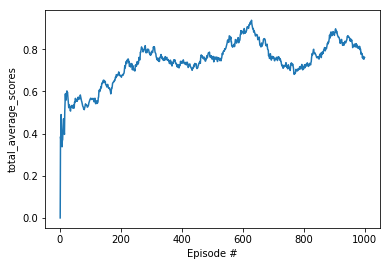

In [10]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

plt.plot(np.arange(1, len(meanRs_deque)+1), meanRs_deque)
plt.ylabel('total_average_scores')
plt.xlabel('Episode #')
plt.show()

### 6. Watch the agent running with saved weights

In [7]:
# Load the saved weights into Pytorch model
agent.g.load_state_dict(torch.load('g-reacher.pth', map_location='cpu'))
agent.d.load_state_dict(torch.load('d-reacher.pth', map_location='cpu'))

env_info = env.reset(train_mode=False)[brain_name]     # reset the environment (env)
s = env_info.vector_observations[0]                  # get the current state (s) (for an agent)
s_ = np.zeros_like(s)

R = 0                          # initialize the total score (R) (for an agent)

while True:
    s = np.reshape(s, [1, -1])
    s_ = np.reshape(s_, [1, -1])
    a = agent.act(s, s_) # select action (a) from loaded model agent
    
    #s2, r, done = env.step(s)
    env_info = env.step(a)[brain_name]           # send an action (a) to the environment (env)
    s2 = env_info.vector_observations[0]         # get next state (s2) (for an agent)
    r = env_info.rewards[0]                     # get reward (for an agent)
    done = env_info.local_done[0]               # see if the episode is done/finished (terminal) for an agent
    
    s2_, _ = agent.env(s, a)
    
    R += r                         # update the total score (R) (for an agent)
    s = s2                               # roll over current state (s) to next state (s2)
    s_ = s2_
    
    if done:                        # exit loop if episode is done/finished for an agent
        break
        
print('Average of total scores: {}'.format(R))

Average of total scores: 39.38999911956489


When finished, you can close the environment.

In [6]:
env.close()